<a href="https://colab.research.google.com/github/DuduVS/Curso_Machine_Learning/blob/master/spotify_popularity_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, adjusted_rand_score, adjusted_mutual_info_score, fowlkes_mallows_score, davies_bouldin_score, silhouette_score, calinski_harabasz_score

# Dataset

In [41]:
data = pd.read_csv('/content/drive/My Drive/Curso - ML/datasets/top10s.csv', encoding='ISO-8859-1')

Source: https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year

Dataset: top songs do spotify de 2010-2019.

Objetivo: tentar entender quais características afetam a popularidade de uma música.


Sobre o dataset:

    Genre - the genre of the track
    Year - the release year of the recording.
    Added - the earliest date you added the track to your collection.
    Beats Per Minute (BPM) - The tempo of the song.
    Energy - The energy of a song - the higher the value, the more energtic the song.
    Danceability - The higher the value, the easier it is to dance to this song.
    Loudness (dB) - The higher the value, the louder the song.
    Liveness - The higher the value, the more likely the song is a live recording.
    Valence - The higher the value, the more positive mood for the song.
    Length - The duration of the song.
    Acousticness - The higher the value the more acoustic the song is.
    Speechiness - The higher the value the more spoken word the song contains.
    Popularity - The higher the value the more popular the song is.
    Duration - The length of the song.



In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  603 non-null    int64 
 1   title       603 non-null    object
 2   artist      603 non-null    object
 3   top genre   603 non-null    object
 4   year        603 non-null    int64 
 5   bpm         603 non-null    int64 
 6   nrgy        603 non-null    int64 
 7   dnce        603 non-null    int64 
 8   dB          603 non-null    int64 
 9   live        603 non-null    int64 
 10  val         603 non-null    int64 
 11  dur         603 non-null    int64 
 12  acous       603 non-null    int64 
 13  spch        603 non-null    int64 
 14  pop         603 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 70.8+ KB


# Pré-análise

Renomeação dos atributos.

In [43]:
data.rename(columns={'Unnamed: 0': 'id', 'top genre':'genre', 'nrgy':'energy', 'dnce':'danceability', 
                     'dB':'loudness', 'val':'valence', 'dur':'length', 'acous':'acousticness',
                     'spch':'speechiness','pop':'popularity'}, inplace=True)

In [44]:
data.head(10)

,id,title,artist,genre,year,bpm,energy,danceability,loudness,live,valence,length,acousticness,speechiness,popularity
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
5,6,Baby,Justin Bieber,canadian pop,2010,65,86,73,-5,11,54,214,4,14,77
6,7,Dynamite,Taio Cruz,dance pop,2010,120,78,75,-4,4,82,203,0,9,77
7,8,Secrets,OneRepublic,dance pop,2010,148,76,52,-6,12,38,225,7,4,77
8,9,Empire State of Mind (Part II) Broken Down,Alicia Keys,hip pop,2010,93,37,48,-8,12,14,216,74,3,76
9,10,Only Girl (In The World),Rihanna,barbadian pop,2010,126,72,79,-4,7,61,235,13,4,73


In [45]:
data = data.dropna()

Alguma observações.

In [46]:
data['genre'].value_counts().head(10)

dance pop                    327
pop                           60
canadian pop                  34
barbadian pop                 15
boy band                      15
electropop                    13
british soul                  11
big room                      10
neo mellow                     9
canadian contemporary r&b      9
Name: genre, dtype: int64

Pop, especialmente dance pop, é de longe o gênero mais popular. 

In [47]:
data['artist'].value_counts().head(10)

Katy Perry          17
Justin Bieber       16
Rihanna             15
Maroon 5            15
Lady Gaga           14
Bruno Mars          13
Shawn Mendes        11
The Chainsmokers    11
Pitbull             11
Ed Sheeran          11
Name: artist, dtype: int64

Katy Perry possui o maior número de músicas no top.

# Pré-processamento

Remoção de atributos categóricos. 

In [48]:
data = data.drop(columns=['id', 'title', 'artist', 'year', 'genre'])

In [49]:
data.head(10)

,bpm,energy,danceability,loudness,live,valence,length,acousticness,speechiness,popularity
0,97,89,67,-4,8,80,217,19,4,83
1,87,93,75,-5,52,64,263,24,23,82
2,120,84,76,-3,29,71,200,10,14,80
3,119,92,70,-4,8,71,295,0,4,79
4,109,84,64,-5,9,43,221,2,4,78
5,65,86,73,-5,11,54,214,4,14,77
6,120,78,75,-4,4,82,203,0,9,77
7,148,76,52,-6,12,38,225,7,4,77
8,93,37,48,-8,12,14,216,74,3,76
9,126,72,79,-4,7,61,235,13,4,73


# Análise

In [ ]:
data.describe()

,bpm,energy,danceability,loudness,live,valence,length,acousticness,speechiness,popularity
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000
max,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


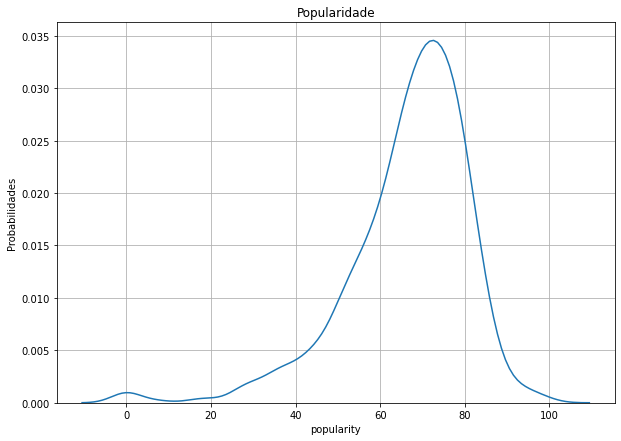

In [ ]:
fig = plt.figure(figsize=(10, 7))
sns.distplot(data.popularity, hist=False, rug=False)
plt.ylabel('Probabilidades')
plt.grid(True)
plt.title('Popularidade')
plt.show()

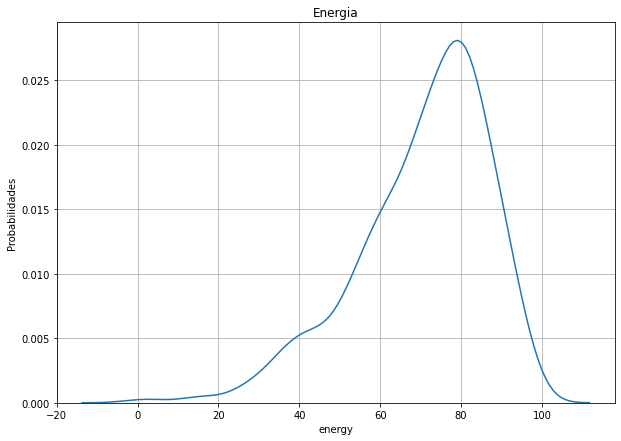

In [ ]:
fig = plt.figure(figsize=(10, 7))
sns.distplot(data.energy, hist=False, rug=False)
plt.ylabel('Probabilidades')
plt.grid(True)
plt.title('Energia')
plt.show()

A energia geralmente é alta.

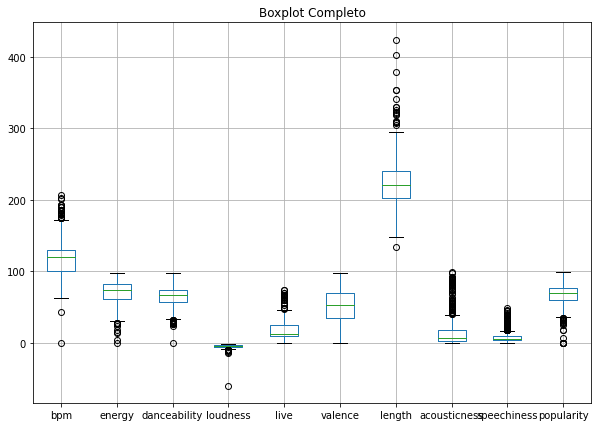

In [ ]:
fig = plt.figure(figsize=(10, 7))
data.boxplot()
plt.title('Boxplot Completo')
plt.show()

Os outliers tendem a ficar apenas ou no mínimo ou no máximo.

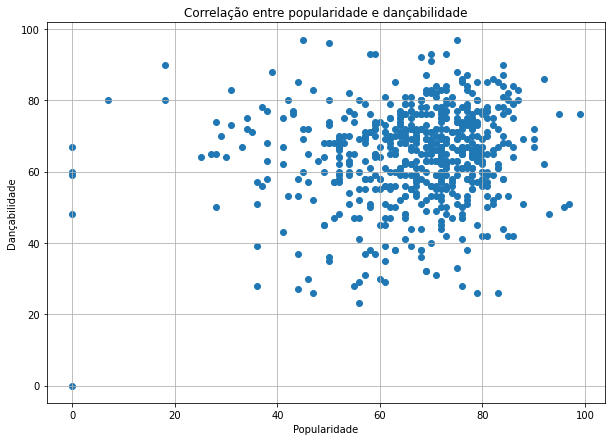

Correlação: 0.11605444461442103


In [ ]:
fig = plt.figure(figsize=(10, 7))
plt.scatter(data.popularity, data.danceability)
plt.xlabel('Popularidade')
plt.ylabel('Dançabilidade')
plt.title('Correlação entre popularidade e dançabilidade')
plt.grid(True)
plt.show()

print(f"Correlação: {data['popularity'].corr(data['danceability'])}")

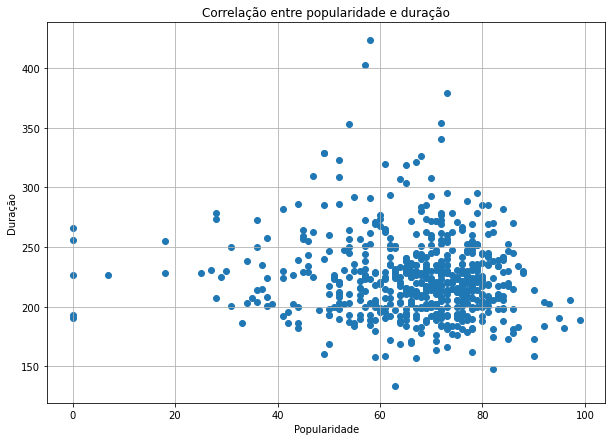

Correlação: -0.10436275315485516


In [ ]:
fig = plt.figure(figsize=(10, 7))
plt.scatter(data.popularity, data.length)
plt.xlabel('Popularidade')
plt.ylabel('Duração')
plt.title('Correlação entre popularidade e duração')
plt.grid(True)
plt.show()

print(f"Correlação: {data['popularity'].corr(data['length'])}")

In [ ]:
corr = data.corr()

In [ ]:
corr

,bpm,energy,danceability,loudness,live,valence,length,acousticness,speechiness,popularity
bpm,1.000000,0.126170,-0.131301,0.183870,0.081579,0.016021,-0.029359,-0.113257,0.058999,0.018983
energy,0.126170,1.000000,0.167209,0.537528,0.186738,0.409577,-0.143610,-0.562287,0.107313,-0.057645
danceability,-0.131301,0.167209,1.000000,0.233170,-0.028801,0.501696,-0.176841,-0.240064,-0.028041,0.116054
loudness,0.183870,0.537528,0.233170,1.000000,0.081934,0.282922,-0.104723,-0.190401,-0.001110,0.156897
live,0.081579,0.186738,-0.028801,0.081934,1.000000,0.020226,0.098339,-0.098167,0.144103,-0.075749
valence,0.016021,0.409577,0.501696,0.282922,0.020226,1.000000,-0.262256,-0.249038,0.122013,0.038953
length,-0.029359,-0.143610,-0.176841,-0.104723,0.098339,-0.262256,1.000000,0.091802,0.054564,-0.104363
acousticness,-0.113257,-0.562287,-0.240064,-0.190401,-0.098167,-0.249038,0.091802,1.000000,0.002763,0.026704
speechiness,0.058999,0.107313,-0.028041,-0.001110,0.144103,0.122013,0.054564,0.002763,1.000000,-0.041490
popularity,0.018983,-0.057645,0.116054,0.156897,-0.075749,0.038953,-0.104363,0.026704,-0.041490,1.000000


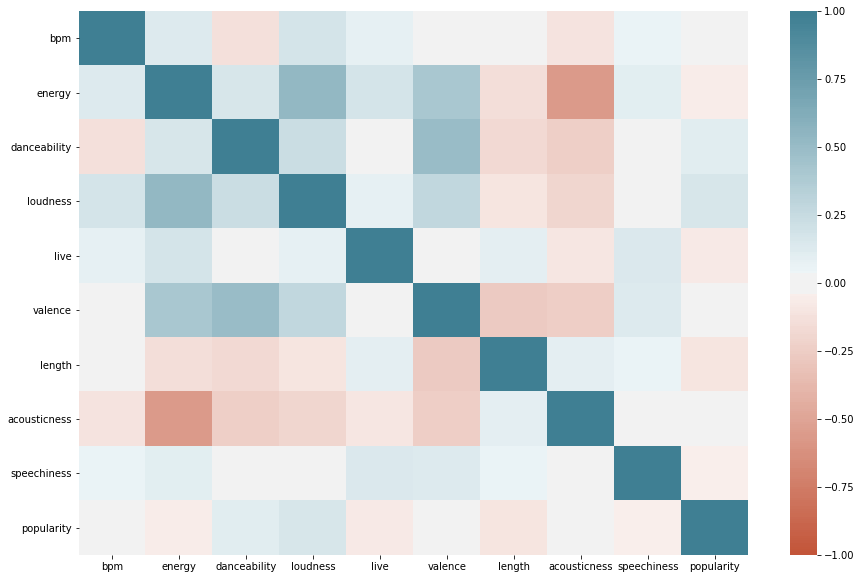

In [ ]:
fig = plt.figure(figsize=(15, 10))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200))

Observações sobre as correlacões dos atributos entre si e com a popularidade:

A energia da música tem considerável correlação positiva com a volume e com a positividade, e correlação negativa com a acusticidade. A dançabilidade também aumenta conforme a positividade.

Poucos atributos afetam diretamente a popularidade, porém pode-se observar que as músicas mais populares tendem a ser mais curtas e serem mais altas/"dançáveis".

Provavelmente seja necessário mais dados para a construção de um bom modelo.




# Aprendizado

Definição dos targets: se > 80, recebe target 4; entre 70 e 80, 3; entre 60 e 70, 2; e < 60, 1.

In [50]:
data.loc[data['popularity'] < 60, 'popularity'] = 1
data.loc[(60 <= data['popularity']) & (data['popularity'] < 70), 'popularity'] = 2
data.loc[(70 <= data['popularity']) & (data['popularity'] < 80), 'popularity'] = 3
data.loc[data['popularity'] >= 80, 'popularity'] = 4

In [14]:
y = data.popularity
y.head()

0    4
1    4
2    4
3    3
4    3
Name: popularity, dtype: int64

In [15]:
from collections import Counter
Counter(y)

Counter({1: 148, 2: 159, 3: 212, 4: 84})

Re-escala

In [51]:
data = (data - data.min())/(data.max() - data.min())

Dados de treino e teste

In [52]:
X = data.iloc[:,0:9]
X.head()

,bpm,energy,danceability,loudness,live,valence,length,acousticness,speechiness
0,0.470874,0.908163,0.690722,0.965517,0.108108,0.816327,0.286207,0.191919,0.083333
1,0.422330,0.948980,0.773196,0.948276,0.702703,0.653061,0.444828,0.242424,0.479167
2,0.582524,0.857143,0.783505,0.982759,0.391892,0.724490,0.227586,0.101010,0.291667
3,0.577670,0.938776,0.721649,0.965517,0.108108,0.724490,0.555172,0.000000,0.083333
4,0.529126,0.857143,0.659794,0.948276,0.121622,0.438776,0.300000,0.020202,0.083333


In [53]:
from sklearn.cluster import KMeans

In [72]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

4 clusters para quatro classes

In [73]:
kmeans_labels = kmeans.predict(X)
kmeans_labels

array([2, 1, 1, 2, 0, 2, 2, 0, 3, 2, 0, 0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 0,
       2, 2, 1, 1, 2, 2, 2, 0, 2, 1, 1, 1, 0, 2, 3, 1, 1, 0, 1, 0, 1, 2,
       3, 1, 2, 2, 1, 2, 0, 3, 3, 1, 0, 2, 1, 1, 1, 0, 2, 2, 1, 1, 0, 0,
       0, 2, 1, 2, 0, 2, 2, 2, 0, 1, 0, 1, 0, 2, 2, 0, 1, 0, 2, 2, 1, 3,
       0, 2, 1, 1, 2, 2, 3, 1, 3, 1, 2, 1, 1, 1, 2, 1, 0, 2, 0, 1, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 1, 0, 2, 1, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2,
       2, 0, 1, 2, 2, 0, 2, 2, 2, 0, 0, 2, 1, 1, 0, 2, 3, 0, 2, 0, 2, 2,
       0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 0, 2, 0, 0, 2, 1,
       0, 0, 2, 1, 0, 1, 1, 1, 0, 1, 3, 0, 1, 2, 1, 1, 3, 0, 1, 2, 0, 1,
       2, 0, 1, 0, 2, 1, 2, 0, 2, 3, 2, 0, 3, 3, 2, 2, 2, 1, 0, 0, 2, 2,
       3, 2, 2, 0, 0, 0, 0, 2, 0, 1, 0, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 0, 3, 0, 2, 0, 0, 2, 3, 0, 2, 1, 1, 3, 3, 1, 0,
       2, 0, 1, 1, 3, 3, 0, 3, 2, 3, 2, 0, 3, 0, 3, 2, 2, 2, 2, 0, 3, 1,
       0, 0, 1, 0, 2, 0, 1, 0, 2, 3, 1, 2, 2, 1, 2,

In [74]:
X = X.reset_index(drop=True)

In [ ]:
groups = pd.DataFrame(kmeans_labels)
X.insert((X.shape[1]), 'popularity', groups)

In [78]:
pop1 = X[X['popularity']==0]
pop2 = X[X['popularity']==1]
pop3 = X[X['popularity']==2]
pop4 = X[X['popularity']==3]

In [79]:
pop1.shape, pop2.shape, pop3.shape, pop4.shape

((220, 10), (222, 10), (103, 10), (58, 10))

O clustering agrupou mais instância na classe 1 e 2, sendo q no dataset a classe 3 é a mais comum. Classe 4 continua sendo a menos representada.

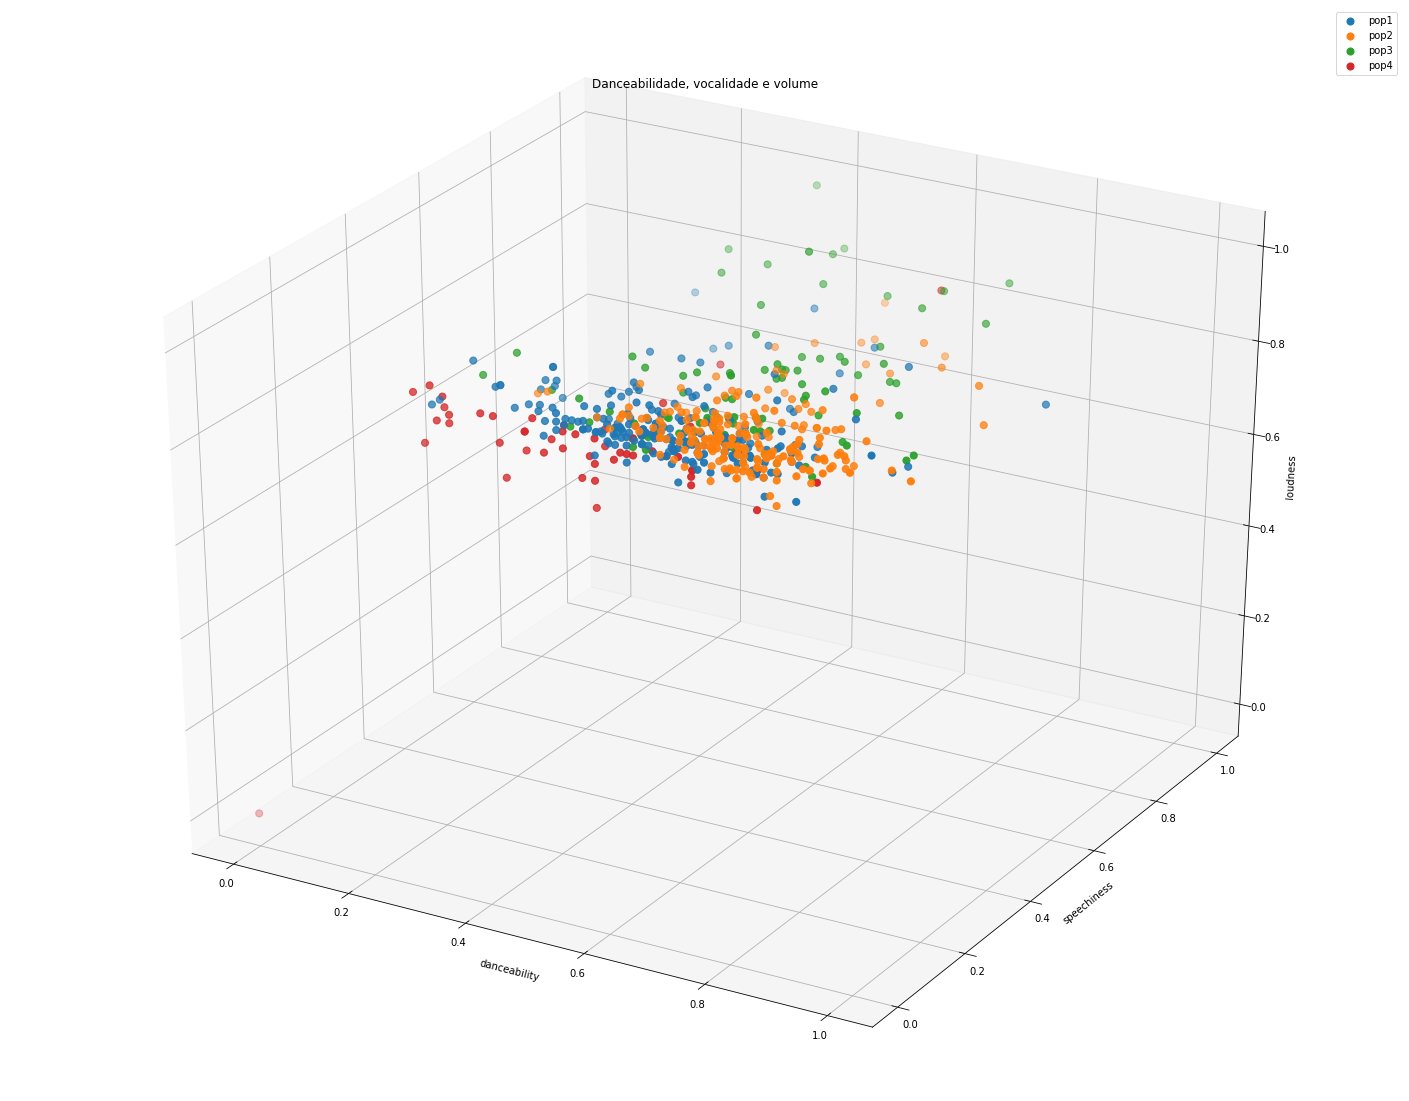

In [80]:
ax = plt.axes(projection='3d')
ax.scatter3D(pop1.danceability, pop1.speechiness, pop1.loudness, s=50, label='pop1')
ax.scatter3D(pop2.danceability, pop2.speechiness, pop2.loudness, s=50, label='pop2')
ax.scatter3D(pop3.danceability, pop3.speechiness, pop3.loudness, s=50, label='pop3')
ax.scatter3D(pop4.danceability, pop4.speechiness, pop4.loudness, s=50, label='pop4')
plt.legend()
ax.set_xlabel('danceability')
ax.set_ylabel('speechiness')
ax.set_zlabel('loudness')
plt.title('Danceabilidade, vocalidade e volume')
plt.show()

Nesse gráfico, é possível ver uma sequência: azul->laranja->verde (popularidade aumentando), porém o vermelho n segue essa sequência. Quando os três atributos aumentam, a popularidade tende a aumentar.

In [81]:
plt.rcParams["figure.figsize"] = (25,20)

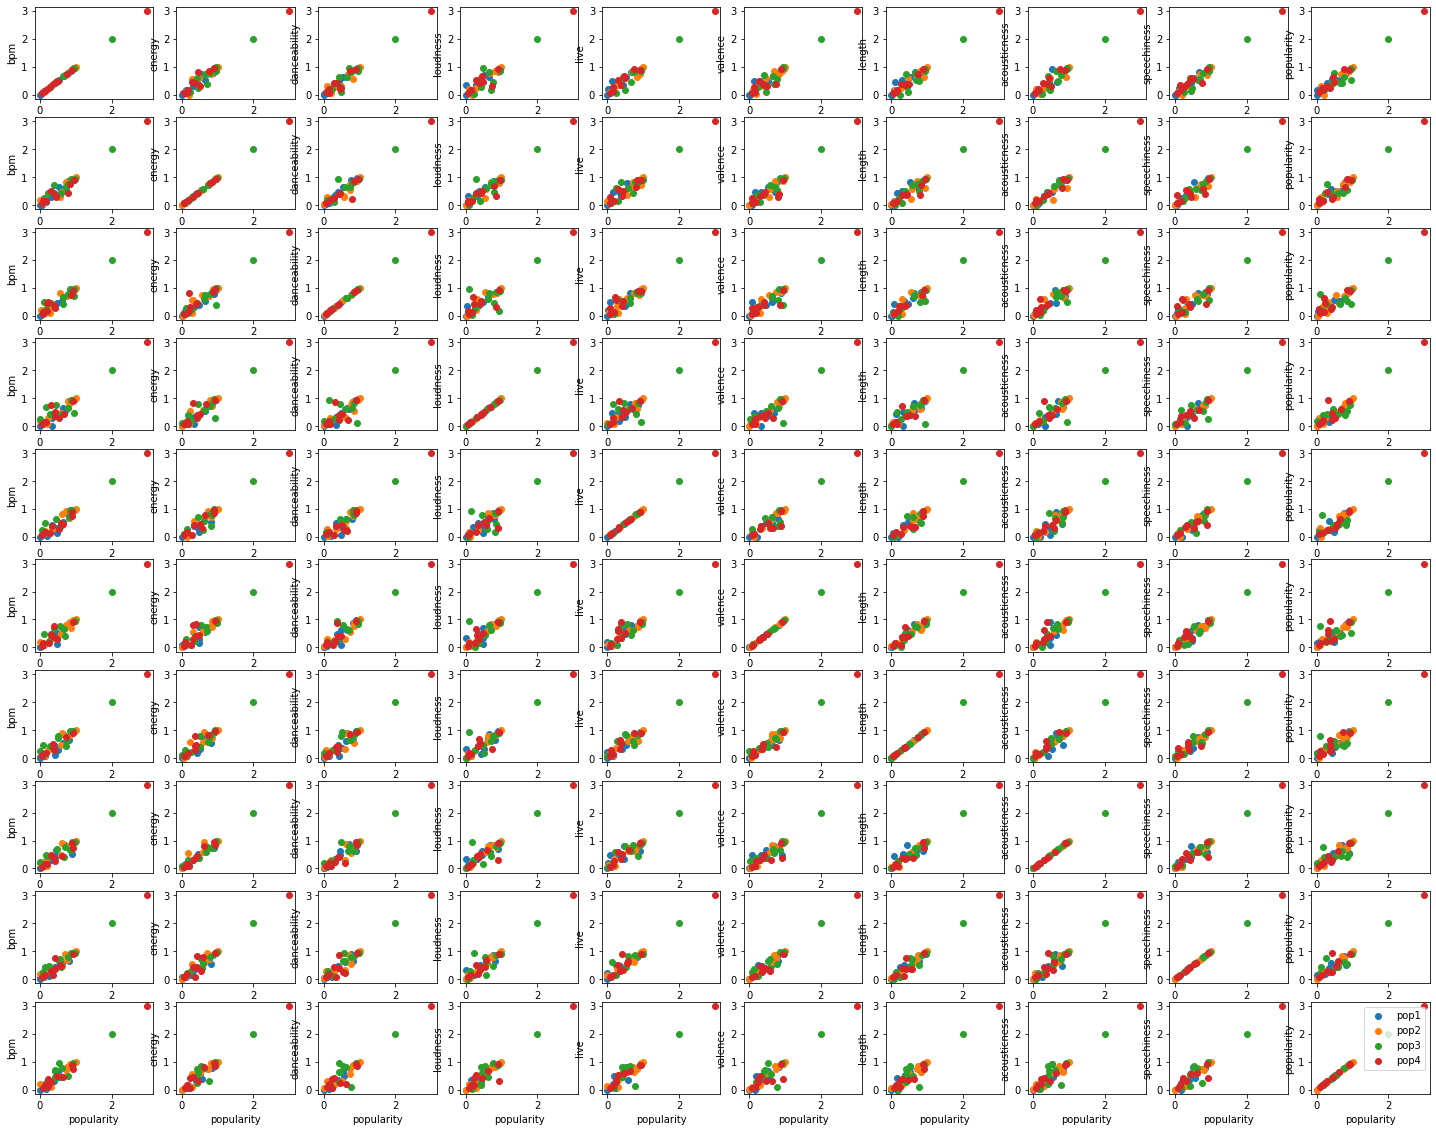

In [83]:
fig, axs = plt.subplots(10, 10)
for i in range(10):
  for j in range(10):
    axs[i,j].scatter(pop1.iloc[i], pop1.iloc[j], label='pop1')
    axs[i,j].scatter(pop2.iloc[i], pop2.iloc[j], label='pop2')
    axs[i,j].scatter(pop3.iloc[i], pop3.iloc[j], label='pop3')
    axs[i,j].scatter(pop4.iloc[i], pop4.iloc[j], label='pop4')
    axs[i,j].set(xlabel=X.columns[i], ylabel=X.columns[j])
plt.legend()
plt.show()

Clustering atributo a atributo n separa bem as instâncias.

In [85]:
acc = accuracy_score(y, kmeans_labels)
acc

0.18076285240464346

In [87]:
rand = adjusted_rand_score(y, kmeans_labels)
rand

0.011317124148913237

In [88]:
mutual_info = adjusted_mutual_info_score(y, kmeans_labels)
mutual_info

0.011305741346521287

In [89]:
fm = fowlkes_mallows_score(y, kmeans_labels)
fm

0.2963137555991995

Observações sobre o treino:

Os resultados foram piores comparados aos outros algoritmos usados. É aparente q o dataset aqui é o gargalo, uma classificação boa provavelmente n será possível com esses atributos/dados.

